In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
#from google.colab import drive
filename = 'no_D_w_lv.xlsx'

# Seed 부여
Seed 를 부여하여 결과값이 랜덤하게 나오지 않게 막았음

In [3]:
import random as rn
seed_num =42
np.random.seed(seed_num)
rn.seed(seed_num)
tf.random.set_seed(seed_num)

In [4]:
df = pd.read_excel(filename)
df.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,데이터 집단 6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,1,2006,7,10,8,189.100000,6.4,7,7,7,...,7,8,8,2.54,6.4,7,7,8,8,2.54
1,1,2006,7,10,9,216.951962,6.3,7,8,7,...,8,10,10,2.53,7.3,7,8,10,10,2.53
2,1,2006,7,10,10,251.424419,6.4,7,9,7,...,9,10,11,2.53,8.2,7,9,10,11,2.53
3,1,2006,7,10,11,302.812199,7.3,7,10,7,...,10,15,14,2.53,11.3,9,10,15,14,2.53
4,1,2006,7,10,12,384.783406,8.2,7,12,8,...,12,18,16,2.53,14.4,12,12,18,16,2.53


In [5]:
df['시간'] = df['시간']-1
df.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,데이터 집단 6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,1,2006,7,10,7,189.100000,6.4,7,7,7,...,7,8,8,2.54,6.4,7,7,8,8,2.54
1,1,2006,7,10,8,216.951962,6.3,7,8,7,...,8,10,10,2.53,7.3,7,8,10,10,2.53
2,1,2006,7,10,9,251.424419,6.4,7,9,7,...,9,10,11,2.53,8.2,7,9,10,11,2.53
3,1,2006,7,10,10,302.812199,7.3,7,10,7,...,10,15,14,2.53,11.3,9,10,15,14,2.53
4,1,2006,7,10,11,384.783406,8.2,7,12,8,...,12,18,16,2.53,14.4,12,12,18,16,2.53


In [6]:
df['dateInt']= df['연'].astype(str) + df['월'].astype(str).str.zfill(2)+df['일'].astype(str).str.zfill(2)+df['시간'].astype(str).str.zfill(2)
df['dateInt']

0       2006071007
1       2006071008
2       2006071009
3       2006071010
4       2006071011
           ...    
3046    2018070716
3047    2018070717
3048    2018070718
3049    2018070719
3050    2018070720
Name: dateInt, Length: 3051, dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['dateInt'], format="%Y%m%d%H")
df['Date']

0      2006-07-10 07:00:00
1      2006-07-10 08:00:00
2      2006-07-10 09:00:00
3      2006-07-10 10:00:00
4      2006-07-10 11:00:00
               ...        
3046   2018-07-07 16:00:00
3047   2018-07-07 17:00:00
3048   2018-07-07 18:00:00
3049   2018-07-07 19:00:00
3050   2018-07-07 20:00:00
Name: Date, Length: 3051, dtype: datetime64[ns]

In [8]:
df.insert(4, '일자', value = df['Date'])
df.head()

,홍수사상번호,연,월,일,일자,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,...,Unnamed: 34,Unnamed: 35,데이터 집단 6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,dateInt,Date
0,1,2006,7,10,2006-07-10 07:00:00,7,189.100000,6.4,7,7,...,8,2.54,6.4,7,7,8,8,2.54,2006071007,2006-07-10 07:00:00
1,1,2006,7,10,2006-07-10 08:00:00,8,216.951962,6.3,7,8,...,10,2.53,7.3,7,8,10,10,2.53,2006071008,2006-07-10 08:00:00
2,1,2006,7,10,2006-07-10 09:00:00,9,251.424419,6.4,7,9,...,11,2.53,8.2,7,9,10,11,2.53,2006071009,2006-07-10 09:00:00
3,1,2006,7,10,2006-07-10 10:00:00,10,302.812199,7.3,7,10,...,14,2.53,11.3,9,10,15,14,2.53,2006071010,2006-07-10 10:00:00
4,1,2006,7,10,2006-07-10 11:00:00,11,384.783406,8.2,7,12,...,16,2.53,14.4,12,12,18,16,2.53,2006071011,2006-07-10 11:00:00


In [9]:
df =df.drop(['연','월','일','시간','dateInt','Date'], axis = 1)
df.head()

,홍수사상번호,일자,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,데이터집단 2,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,데이터 집단 6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,1,2006-07-10 07:00:00,189.100000,6.4,7,7,7,8,2.54,6.3,...,7,8,8,2.54,6.4,7,7,8,8,2.54
1,1,2006-07-10 08:00:00,216.951962,6.3,7,8,7,8,2.53,6.4,...,8,10,10,2.53,7.3,7,8,10,10,2.53
2,1,2006-07-10 09:00:00,251.424419,6.4,7,9,7,8,2.53,7.3,...,9,10,11,2.53,8.2,7,9,10,11,2.53
3,1,2006-07-10 10:00:00,302.812199,7.3,7,10,7,8,2.53,8.2,...,10,15,14,2.53,11.3,9,10,15,14,2.53
4,1,2006-07-10 11:00:00,384.783406,8.2,7,12,8,10,2.53,11.3,...,12,18,16,2.53,14.4,12,12,18,16,2.53


In [10]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
# scale_cols = ['유입량', '데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47']
scale_cols = ['유입량', '데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','데이터집단 2','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','데이터집단 3','Unnamed: 19','Unnamed: 21','Unnamed: 22','Unnamed: 23','데이터 집단 4','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','데이터 집단 5','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 35','데이터 집단 6','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,데이터집단 2,Unnamed: 13,Unnamed: 14,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 35,데이터 집단 6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.019184,0.020772,0.019074,...,0.020290,0.019608,0.028986,0.093930,0.020046,0.020290,0.019499,0.032389,0.030651,0.093930
1,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.019488,0.020772,0.021798,...,0.020290,0.022409,0.036232,0.093291,0.022873,0.020290,0.022284,0.040486,0.038314,0.093291
2,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.022229,0.020772,0.024523,...,0.020290,0.025210,0.036232,0.093291,0.025700,0.020290,0.025070,0.040486,0.042146,0.093291
3,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.024970,0.020772,0.027248,...,0.026087,0.028011,0.054348,0.093291,0.035436,0.026087,0.027855,0.060729,0.053640,0.093291
4,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.034409,0.026706,0.032698,...,0.034783,0.033613,0.065217,0.093291,0.045173,0.034783,0.033426,0.072874,0.061303,0.093291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,NaN,0.007213,0.003040,0.000000,0.000000,0.000000,0.133546,0.007213,0.002967,0.000000,...,0.002899,0.000000,0.003623,0.133546,0.006767,0.002899,0.000000,0.000000,0.000000,0.133546
3047,NaN,0.007213,0.003040,0.000000,0.000000,0.000000,0.132907,0.007213,0.002967,0.000000,...,0.002899,0.000000,0.003623,0.132907,0.006479,0.002899,0.000000,0.000000,0.000000,0.132907
3048,NaN,0.007213,0.003040,0.000000,0.000000,0.000000,0.131629,0.007213,0.002967,0.000000,...,0.002899,0.000000,0.003623,0.131629,0.006337,0.002899,0.000000,0.000000,0.000000,0.131629
3049,NaN,0.007213,0.003040,0.000000,0.000000,0.000000,0.130351,0.007213,0.002967,0.000000,...,0.002899,0.000000,0.003623,0.130351,0.005910,0.002899,0.000000,0.000000,0.000000,0.130351


In [11]:
'''
rolling_10 = df[scale_cols].rolling(10, min_periods=0).mean()
plt.plot(rolling_10)
plt.title('ETH rolling window=10')
'''

"\nrolling_10 = df[scale_cols].rolling(10, min_periods=0).mean()\nplt.plot(rolling_10)\nplt.title('ETH rolling window=10')\n"

Text(0, 0.5, 'AMOUNT')

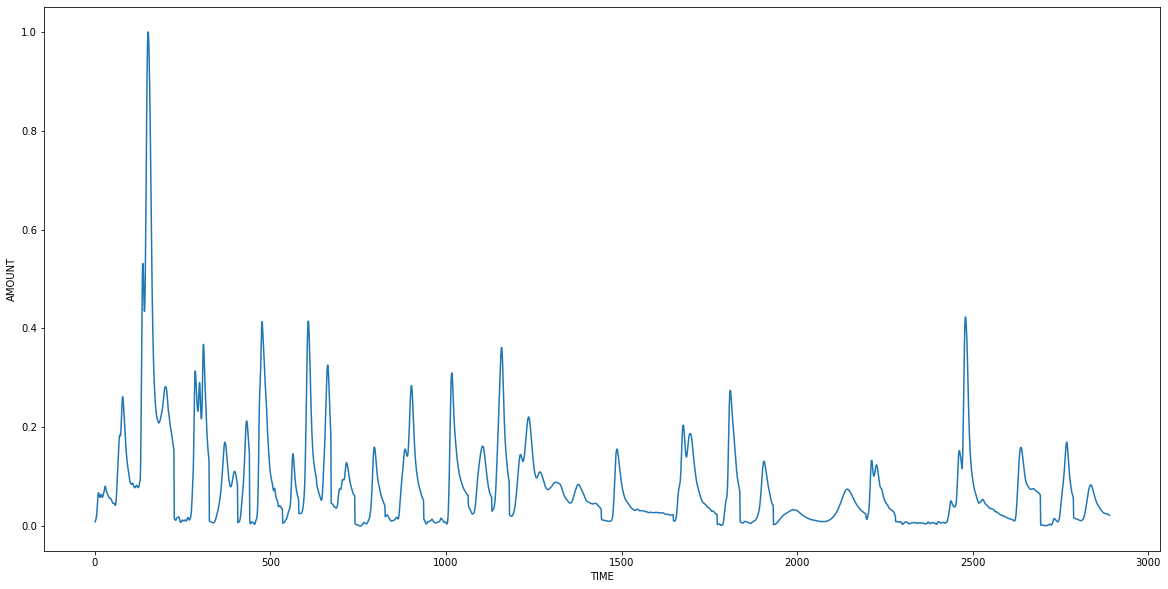

In [12]:
plt.figure(figsize=(20, 10))
# sns.lineplot(y=df_scaled['유입량'], x=df['일자'])
# plt.xlabel('TIME')
# plt.ylabel('AMOUNT')
plt.plot(df_scaled['유입량'])
plt.xlabel('TIME')
plt.ylabel('AMOUNT')

In [13]:
TEST_SIZE = 160
VAL_SIZE = 958

train1 = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]
#print(train1)
print(test)

train = train1[:-VAL_SIZE]
print(train)
validation = train1[-VAL_SIZE:]
print(validation)

      유입량   데이터집단 1  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
2891  NaN  0.043415    0.097264    0.000000    0.000000     0.000000   
2892  NaN  0.033391    0.060790    0.002725    0.000000     0.000000   
2893  NaN  0.024191    0.033435    0.013624    0.000000     0.000000   
2894  NaN  0.024030    0.009119    0.029973    0.000000     0.000000   
2895  NaN  0.040647    0.012158    0.068120    0.003953     0.030534   
...   ...       ...         ...         ...         ...          ...   
3046  NaN  0.007213    0.003040    0.000000    0.000000     0.000000   
3047  NaN  0.007213    0.003040    0.000000    0.000000     0.000000   
3048  NaN  0.007213    0.003040    0.000000    0.000000     0.000000   
3049  NaN  0.007213    0.003040    0.000000    0.000000     0.000000   
3050  NaN  0.007213    0.003040    0.000000    0.000000     0.000000   

      Unnamed: 11   데이터집단 2  Unnamed: 13  Unnamed: 14  ...  Unnamed: 31  \
2891     0.054952  0.033391     0.094955     0.000000  ...  

In [14]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [15]:
'''
def make_dataset(training_data, t, h=0, test_size=0.2):
    
    X_train = []
    y_train = []
    for i in range(t, len(training_data)-h):
        X_train.append(training_data[i-t:i])
        y_train.append(training_data[i+h])
    X = np.array(X_train)
    y = np.array(y_train)

    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    return X_train,X_test,y_train,y_test
'''

'\ndef make_dataset(training_data, t, h=0, test_size=0.2):\n    \n    X_train = []\n    y_train = []\n    for i in range(t, len(training_data)-h):\n        X_train.append(training_data[i-t:i])\n        y_train.append(training_data[i+h])\n    X = np.array(X_train)\n    y = np.array(y_train)\n\n    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, shuffle=False)\n\n    return X_train,X_test,y_train,y_test\n'

In [16]:
from sklearn.model_selection import train_test_split
feature_cols = ['데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','데이터집단 2','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','데이터집단 3','Unnamed: 19','Unnamed: 21','Unnamed: 22','Unnamed: 23','데이터 집단 4','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','데이터 집단 5','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 35','데이터 집단 6','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41']
# feature_cols = ['데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47']
label_cols = ['유입량']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_label

,유입량
0,0.008630
1,0.009926
2,0.011529
3,0.013919
4,0.017731
...,...
1928,0.046990
1929,0.045159
1930,0.043906
1931,0.043071


In [17]:
train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

print(train_feature)

(1530, 20, 34) (383, 20, 34)
[[[0.01948843 0.0212766  0.01907357 ... 0.03238866 0.03065134 0.09392971]
  [0.01918392 0.0212766  0.02179837 ... 0.04048583 0.03831418 0.09329073]
  [0.01948843 0.0212766  0.02452316 ... 0.04048583 0.04214559 0.09329073]
  ...
  [0.17356882 0.12462006 0.16621253 ... 0.20242915 0.23754789 0.18913738]
  [0.1772229  0.12462006 0.16893733 ... 0.20647773 0.23754789 0.19744409]
  [0.18087698 0.13069909 0.17166213 ... 0.19838057 0.24137931 0.20127796]]

 [[0.01918392 0.0212766  0.02179837 ... 0.04048583 0.03831418 0.09329073]
  [0.01948843 0.0212766  0.02452316 ... 0.04048583 0.04214559 0.09329073]
  [0.02222899 0.0212766  0.02724796 ... 0.06072874 0.05363985 0.09329073]
  ...
  [0.1772229  0.12462006 0.16893733 ... 0.20647773 0.23754789 0.19744409]
  [0.18087698 0.13069909 0.17166213 ... 0.19838057 0.24137931 0.20127796]
  [0.18392205 0.1337386  0.17438692 ... 0.19433198 0.24137931 0.20191693]]

 [[0.01948843 0.0212766  0.02452316 ... 0.04048583 0.04214559 0.093

In [18]:
val_feature = validation[feature_cols]
val_label = validation[label_cols]

print(val_feature.shape, val_label.shape)

print(val_feature)

(958, 34) (958, 1)
       데이터집단 1  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
1933  0.185096    0.151976    0.171662    0.051383     0.114504     0.057508   
1934  0.185096    0.151976    0.171662    0.047431     0.083969     0.056869   
1935  0.182255    0.151976    0.174387    0.043478     0.045802     0.056230   
1936  0.178430    0.109422    0.171662    0.043478     0.026718     0.055591   
1937  0.175629    0.106383    0.171662    0.039526     0.026718     0.055591   
...        ...         ...         ...         ...          ...          ...   
2886  0.069378    0.018237    0.000000    0.003953     0.003817     0.125240   
2887  0.025148    0.006079    0.000000    0.003953     0.003817     0.123323   
2888  0.012512    0.003040    0.000000    0.003953     0.003817     0.122045   
2889  0.010309    0.003040    0.000000    0.003953     0.003817     0.120767   
2890  0.010000    0.003040    0.000000    0.003953     0.003817     0.119489   

       데이터집단 2  Unna

In [19]:
val_feature, val_label = make_dataset(val_feature, val_label, 20)
print(val_feature.shape, val_label.shape)

print(val_feature)

(938, 20, 34) (938, 1)
[[[0.18509562 0.15197568 0.17166213 ... 0.01214575 0.02681992 0.05750799]
  [0.18509562 0.15197568 0.17166213 ... 0.         0.02681992 0.05686901]
  [0.18225457 0.15197568 0.17438692 ... 0.         0.02298851 0.05623003]
  ...
  [0.03981334 0.01519757 0.01634877 ... 0.         0.00383142 0.04920128]
  [0.03528563 0.01519757 0.01634877 ... 0.         0.00383142 0.04920128]
  [0.03844671 0.01519757 0.02724796 ... 0.04453441 0.03065134 0.0485623 ]]

 [[0.18509562 0.15197568 0.17166213 ... 0.         0.02681992 0.05686901]
  [0.18225457 0.15197568 0.17438692 ... 0.         0.02298851 0.05623003]
  [0.17842996 0.10942249 0.17166213 ... 0.         0.01149425 0.05559105]
  ...
  [0.03528563 0.01519757 0.01634877 ... 0.         0.00383142 0.04920128]
  [0.03844671 0.01519757 0.02724796 ... 0.04453441 0.03065134 0.0485623 ]
  [0.04083435 0.03039514 0.04087193 ... 0.08502024 0.0651341  0.0485623 ]]

 [[0.18225457 0.15197568 0.17438692 ... 0.         0.02298851 0.05623003]

In [20]:
# from keras.models import Sequential
# from keras.layers import Dense
#from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM,Dense

model = tf.keras.Sequential()
model.add(LSTM(20, input_shape=(train_feature.shape[1], train_feature.shape[2]), activation='tanh', return_sequences=False))
model.add(Dense(1))

2021-09-13 21:14:25.862220: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-09-13 21:14:25.879419: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fba3ff9ab40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-13 21:14:25.879434: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [21]:
#import os
# from keras import optimizers

optimizer = tf.keras.optimizers.Adam(lr=0.0001)

model.compile(loss='mean_squared_error', optimizer='adam')
'''
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
'''
history = model.fit(x_train, y_train, 
                                    epochs=5000, 
                                    batch_size=32,
                                    validation_data=(x_valid, y_valid))
                                    #callbacks=[early_stop, checkpoint])

Epoch 1/5000
48/48 [==============================] - 1s 17ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 2/5000
48/48 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 3/5000
48/48 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/5000
48/48 [==============================] - 1s 11ms/step - loss: 9.9599e-04 - val_loss: 8.9663e-04
Epoch 5/5000
48/48 [==============================] - 1s 11ms/step - loss: 9.7338e-04 - val_loss: 0.0010
Epoch 6/5000
48/48 [==============================] - 0s 9ms/step - loss: 7.5675e-04 - val_loss: 8.4936e-04
Epoch 7/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.2699e-04 - val_loss: 7.6384e-04
Epoch 8/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.3813e-04 - val_loss: 7.1469e-04
Epoch 9/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.6195e-04 - val_loss: 6.1878e-04
Epoch 10/5000
48/48 [==============================

48/48 [==============================] - 0s 7ms/step - loss: 3.7069e-04 - val_loss: 2.7454e-04
Epoch 77/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.0942e-04 - val_loss: 4.2824e-04
Epoch 78/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.3396e-04 - val_loss: 4.6316e-04
Epoch 79/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.9184e-04 - val_loss: 3.0763e-04
Epoch 80/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.8264e-04 - val_loss: 2.9776e-04
Epoch 81/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.0526e-04 - val_loss: 2.6994e-04
Epoch 82/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.8285e-04 - val_loss: 2.6908e-04
Epoch 83/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5954e-04 - val_loss: 2.5491e-04
Epoch 84/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.4611e-04 - val_loss: 2.4286e-04
Epoch 85/5000
48/48 [============

Epoch 151/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.6229e-04 - val_loss: 1.7904e-04
Epoch 152/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.5583e-04 - val_loss: 2.0223e-04
Epoch 153/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.7549e-04 - val_loss: 2.1649e-04
Epoch 154/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.9343e-04 - val_loss: 2.0710e-04
Epoch 155/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5990e-04 - val_loss: 2.1696e-04
Epoch 156/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5764e-04 - val_loss: 1.9598e-04
Epoch 157/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.6838e-04 - val_loss: 1.9843e-04
Epoch 158/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.7497e-04 - val_loss: 2.6469e-04
Epoch 159/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5595e-04 - val_loss: 1.9254e-04
Epoch 160/

48/48 [==============================] - 0s 8ms/step - loss: 1.2406e-04 - val_loss: 2.3818e-04
Epoch 226/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.3195e-04 - val_loss: 1.8812e-04
Epoch 227/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.4243e-04 - val_loss: 2.1019e-04
Epoch 228/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.4223e-04 - val_loss: 1.5434e-04
Epoch 229/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.3101e-04 - val_loss: 1.9508e-04
Epoch 230/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.3743e-04 - val_loss: 1.8630e-04
Epoch 231/5000
48/48 [==============================] - 0s 9ms/step - loss: 1.3416e-04 - val_loss: 1.4750e-04
Epoch 232/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.1198e-04 - val_loss: 1.5684e-04
Epoch 233/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.2467e-04 - val_loss: 1.6232e-04
Epoch 234/5000
48/48 [===

48/48 [==============================] - 0s 7ms/step - loss: 1.3671e-04 - val_loss: 1.9515e-04
Epoch 300/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.2835e-04 - val_loss: 1.6529e-04
Epoch 301/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.1034e-04 - val_loss: 1.4303e-04
Epoch 302/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.6247e-05 - val_loss: 1.3220e-04
Epoch 303/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.1693e-04 - val_loss: 2.2856e-04
Epoch 304/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.2294e-04 - val_loss: 1.4554e-04
Epoch 305/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.0919e-04 - val_loss: 1.3418e-04
Epoch 306/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.3614e-04 - val_loss: 1.6146e-04
Epoch 307/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.0618e-04 - val_loss: 1.6781e-04
Epoch 308/5000
48/48 [===

48/48 [==============================] - 0s 7ms/step - loss: 1.0166e-04 - val_loss: 1.2842e-04
Epoch 374/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.1099e-05 - val_loss: 1.3817e-04
Epoch 375/5000
48/48 [==============================] - 0s 8ms/step - loss: 8.5486e-05 - val_loss: 1.3251e-04
Epoch 376/5000
48/48 [==============================] - 0s 8ms/step - loss: 9.7069e-05 - val_loss: 1.2519e-04
Epoch 377/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.0392e-04 - val_loss: 1.3881e-04
Epoch 378/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.1989e-05 - val_loss: 1.2618e-04
Epoch 379/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.9099e-05 - val_loss: 1.3355e-04
Epoch 380/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.4965e-05 - val_loss: 1.4095e-04
Epoch 381/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.9769e-05 - val_loss: 1.4528e-04
Epoch 382/5000
48/48 [===

48/48 [==============================] - 0s 8ms/step - loss: 8.6807e-05 - val_loss: 1.1873e-04
Epoch 448/5000
48/48 [==============================] - 0s 8ms/step - loss: 9.5521e-05 - val_loss: 1.4606e-04
Epoch 449/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.9986e-05 - val_loss: 1.3431e-04
Epoch 450/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.5780e-05 - val_loss: 1.0526e-04
Epoch 451/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.5512e-05 - val_loss: 1.3006e-04
Epoch 452/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.3284e-05 - val_loss: 1.2324e-04
Epoch 453/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.0595e-05 - val_loss: 1.3724e-04
Epoch 454/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.9213e-05 - val_loss: 1.1201e-04
Epoch 455/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.7608e-05 - val_loss: 1.1902e-04
Epoch 456/5000
48/48 [===

48/48 [==============================] - 0s 7ms/step - loss: 5.6970e-05 - val_loss: 1.0541e-04
Epoch 522/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.6813e-05 - val_loss: 1.2321e-04
Epoch 523/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.0537e-05 - val_loss: 1.2811e-04
Epoch 524/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.7168e-05 - val_loss: 1.0041e-04
Epoch 525/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.8558e-05 - val_loss: 1.1103e-04
Epoch 526/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.6215e-05 - val_loss: 1.1063e-04
Epoch 527/5000
48/48 [==============================] - 0s 9ms/step - loss: 8.8994e-05 - val_loss: 1.1834e-04
Epoch 528/5000
48/48 [==============================] - 0s 8ms/step - loss: 5.5621e-05 - val_loss: 1.2062e-04
Epoch 529/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.6650e-05 - val_loss: 1.1461e-04
Epoch 530/5000
48/48 [===

48/48 [==============================] - 0s 7ms/step - loss: 6.4653e-05 - val_loss: 1.1782e-04
Epoch 596/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.1861e-05 - val_loss: 1.0138e-04
Epoch 597/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.3717e-05 - val_loss: 1.0592e-04
Epoch 598/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.5076e-05 - val_loss: 1.0790e-04
Epoch 599/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.8007e-05 - val_loss: 1.0609e-04
Epoch 600/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.0616e-05 - val_loss: 1.1470e-04
Epoch 601/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.1069e-05 - val_loss: 1.0302e-04
Epoch 602/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.6174e-05 - val_loss: 9.7908e-05
Epoch 603/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.9020e-05 - val_loss: 1.1138e-04
Epoch 604/5000
48/48 [===

48/48 [==============================] - 0s 7ms/step - loss: 5.1072e-05 - val_loss: 1.1153e-04
Epoch 670/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.6314e-05 - val_loss: 9.9169e-05
Epoch 671/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.6221e-05 - val_loss: 1.0752e-04
Epoch 672/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.6952e-05 - val_loss: 1.1075e-04
Epoch 673/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.7000e-05 - val_loss: 1.0012e-04
Epoch 674/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.6477e-05 - val_loss: 1.3188e-04
Epoch 675/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.4691e-05 - val_loss: 1.1571e-04
Epoch 676/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.7509e-05 - val_loss: 1.1516e-04
Epoch 677/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0583e-05 - val_loss: 9.9208e-05
Epoch 678/5000
48/48 [===

48/48 [==============================] - 0s 8ms/step - loss: 3.9543e-05 - val_loss: 9.6128e-05
Epoch 744/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.4909e-05 - val_loss: 9.5892e-05
Epoch 745/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.2149e-05 - val_loss: 9.7965e-05
Epoch 746/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.3684e-05 - val_loss: 9.1300e-05
Epoch 747/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.4103e-05 - val_loss: 9.6548e-05
Epoch 748/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.2841e-05 - val_loss: 1.0547e-04
Epoch 749/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.5205e-05 - val_loss: 9.0521e-05
Epoch 750/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.6269e-05 - val_loss: 1.0026e-04
Epoch 751/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.1115e-05 - val_loss: 9.0596e-05
Epoch 752/5000
48/48 [===

48/48 [==============================] - 0s 8ms/step - loss: 2.7742e-05 - val_loss: 8.4764e-05
Epoch 818/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.4168e-05 - val_loss: 1.2483e-04
Epoch 819/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.0370e-05 - val_loss: 8.7587e-05
Epoch 820/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.9249e-05 - val_loss: 1.0755e-04
Epoch 821/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0508e-05 - val_loss: 8.8126e-05
Epoch 822/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.6552e-05 - val_loss: 1.2317e-04
Epoch 823/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.3479e-05 - val_loss: 9.3975e-05
Epoch 824/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.7832e-05 - val_loss: 1.0242e-04
Epoch 825/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.7823e-05 - val_loss: 1.3976e-04
Epoch 826/5000
48/48 [===

48/48 [==============================] - 0s 8ms/step - loss: 2.4773e-05 - val_loss: 8.4443e-05
Epoch 892/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.4205e-05 - val_loss: 9.0339e-05
Epoch 893/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.5126e-05 - val_loss: 9.2920e-05
Epoch 894/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.7059e-05 - val_loss: 1.0715e-04
Epoch 895/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.4178e-05 - val_loss: 1.0616e-04
Epoch 896/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.2939e-05 - val_loss: 1.3255e-04
Epoch 897/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.8572e-05 - val_loss: 1.0271e-04
Epoch 898/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.0297e-05 - val_loss: 9.9836e-05
Epoch 899/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.0465e-05 - val_loss: 9.2493e-05
Epoch 900/5000
48/48 [===

48/48 [==============================] - 0s 7ms/step - loss: 2.4543e-05 - val_loss: 8.3976e-05
Epoch 966/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5173e-05 - val_loss: 1.2887e-04
Epoch 967/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.2786e-05 - val_loss: 8.6872e-05
Epoch 968/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.9809e-05 - val_loss: 9.1247e-05
Epoch 969/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.3515e-05 - val_loss: 9.7116e-05
Epoch 970/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.8245e-05 - val_loss: 9.7501e-05
Epoch 971/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.3260e-05 - val_loss: 1.3125e-04
Epoch 972/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.4095e-05 - val_loss: 9.2991e-05
Epoch 973/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.7869e-05 - val_loss: 7.8976e-05
Epoch 974/5000
48/48 [===

48/48 [==============================] - 0s 8ms/step - loss: 2.0071e-05 - val_loss: 1.0048e-04
Epoch 1040/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.4833e-05 - val_loss: 8.1821e-05
Epoch 1041/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.2928e-05 - val_loss: 1.1325e-04
Epoch 1042/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.5838e-05 - val_loss: 9.2409e-05
Epoch 1043/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.9822e-05 - val_loss: 8.1846e-05
Epoch 1044/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.6450e-05 - val_loss: 1.0502e-04
Epoch 1045/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0228e-05 - val_loss: 8.5499e-05
Epoch 1046/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.3733e-05 - val_loss: 9.5784e-05
Epoch 1047/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.5379e-05 - val_loss: 1.0909e-04
Epoch 1048/5000
4

Epoch 1113/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9778e-05 - val_loss: 7.9701e-05
Epoch 1114/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.8863e-05 - val_loss: 8.9319e-05
Epoch 1115/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.8510e-05 - val_loss: 8.2132e-05
Epoch 1116/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.9035e-05 - val_loss: 9.2692e-05
Epoch 1117/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.6092e-05 - val_loss: 8.3632e-05
Epoch 1118/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.0169e-05 - val_loss: 8.1037e-05
Epoch 1119/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.6882e-05 - val_loss: 1.1761e-04
Epoch 1120/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9297e-05 - val_loss: 9.0002e-05
Epoch 1121/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.8718e-05 - val_loss: 1.0553e-04
E

Epoch 1187/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.0700e-05 - val_loss: 1.0393e-04
Epoch 1188/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.8375e-05 - val_loss: 9.0589e-05
Epoch 1189/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.3846e-05 - val_loss: 8.2214e-05
Epoch 1190/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.2369e-05 - val_loss: 9.0457e-05
Epoch 1191/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.9999e-05 - val_loss: 8.9286e-05
Epoch 1192/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.6677e-05 - val_loss: 8.2656e-05
Epoch 1193/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.7692e-05 - val_loss: 8.2131e-05
Epoch 1194/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.2098e-05 - val_loss: 7.9645e-05
Epoch 1195/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.6902e-05 - val_loss: 8.2583e-05
E

Epoch 1261/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.9284e-05 - val_loss: 1.1310e-04
Epoch 1262/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.0411e-05 - val_loss: 9.3479e-05
Epoch 1263/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.7574e-05 - val_loss: 9.4564e-05
Epoch 1264/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.5047e-05 - val_loss: 9.7664e-05
Epoch 1265/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5463e-05 - val_loss: 9.3086e-05
Epoch 1266/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.7277e-05 - val_loss: 7.8488e-05
Epoch 1267/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.6964e-05 - val_loss: 8.7680e-05
Epoch 1268/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9107e-05 - val_loss: 1.0442e-04
Epoch 1269/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.5383e-05 - val_loss: 7.7789e-05
E

Epoch 1335/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.2734e-05 - val_loss: 1.0239e-04
Epoch 1336/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.6349e-05 - val_loss: 7.8881e-05
Epoch 1337/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.0752e-05 - val_loss: 7.9055e-05
Epoch 1338/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.8577e-05 - val_loss: 1.0567e-04
Epoch 1339/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.2533e-05 - val_loss: 8.1745e-05
Epoch 1340/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.0626e-05 - val_loss: 7.8729e-05
Epoch 1341/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.4359e-05 - val_loss: 8.6325e-05
Epoch 1342/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9029e-05 - val_loss: 8.2402e-05
Epoch 1343/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.6770e-05 - val_loss: 8.9786e-05
E

Epoch 1409/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.3987e-05 - val_loss: 8.4737e-05
Epoch 1410/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.3397e-05 - val_loss: 8.3111e-05
Epoch 1411/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.3425e-05 - val_loss: 8.4689e-05
Epoch 1412/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.9686e-05 - val_loss: 9.7555e-05
Epoch 1413/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.1734e-05 - val_loss: 9.8670e-05
Epoch 1414/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.8317e-05 - val_loss: 7.9446e-05
Epoch 1415/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.7056e-05 - val_loss: 9.3190e-05
Epoch 1416/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9448e-05 - val_loss: 8.8663e-05
Epoch 1417/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.1029e-05 - val_loss: 8.7202e-05
E

Epoch 1483/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.3647e-05 - val_loss: 9.2514e-05
Epoch 1484/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.3859e-05 - val_loss: 7.1073e-05
Epoch 1485/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.3470e-05 - val_loss: 8.3510e-05
Epoch 1486/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.7427e-05 - val_loss: 8.2837e-05
Epoch 1487/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9979e-05 - val_loss: 8.3251e-05
Epoch 1488/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.2622e-05 - val_loss: 8.2153e-05
Epoch 1489/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.7929e-06 - val_loss: 8.0041e-05
Epoch 1490/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5663e-05 - val_loss: 7.5031e-05
Epoch 1491/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.8291e-05 - val_loss: 7.2679e-05
E

Epoch 1557/5000
48/48 [==============================] - 0s 9ms/step - loss: 9.5509e-06 - val_loss: 7.7006e-05
Epoch 1558/5000
48/48 [==============================] - 0s 10ms/step - loss: 7.7591e-06 - val_loss: 7.9731e-05
Epoch 1559/5000
48/48 [==============================] - 0s 9ms/step - loss: 8.4394e-06 - val_loss: 7.0578e-05
Epoch 1560/5000
48/48 [==============================] - 0s 9ms/step - loss: 1.1772e-05 - val_loss: 8.1961e-05
Epoch 1561/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.0281e-05 - val_loss: 7.8908e-05
Epoch 1562/5000
48/48 [==============================] - 0s 10ms/step - loss: 1.4377e-05 - val_loss: 1.0615e-04
Epoch 1563/5000
48/48 [==============================] - 0s 8ms/step - loss: 8.9419e-05 - val_loss: 1.1753e-04
Epoch 1564/5000
48/48 [==============================] - 0s 8ms/step - loss: 5.0139e-05 - val_loss: 1.1234e-04
Epoch 1565/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.1120e-05 - val_loss: 9.4777e-05

Epoch 1631/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.3141e-06 - val_loss: 8.0343e-05
Epoch 1632/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.1670e-05 - val_loss: 8.2894e-05
Epoch 1633/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.6216e-06 - val_loss: 7.4219e-05
Epoch 1634/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.7418e-06 - val_loss: 8.2720e-05
Epoch 1635/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.5339e-06 - val_loss: 8.0024e-05
Epoch 1636/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.8896e-06 - val_loss: 8.5889e-05
Epoch 1637/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.0949e-05 - val_loss: 8.6172e-05
Epoch 1638/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5678e-05 - val_loss: 7.0919e-05
Epoch 1639/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.2404e-05 - val_loss: 9.6493e-05
E

Epoch 1705/5000
48/48 [==============================] - 0s 8ms/step - loss: 9.9108e-06 - val_loss: 7.0728e-05
Epoch 1706/5000
48/48 [==============================] - 0s 8ms/step - loss: 8.4846e-06 - val_loss: 7.3278e-05
Epoch 1707/5000
48/48 [==============================] - 0s 8ms/step - loss: 8.7309e-06 - val_loss: 8.0440e-05
Epoch 1708/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.6517e-06 - val_loss: 7.7660e-05
Epoch 1709/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.9938e-06 - val_loss: 7.5441e-05
Epoch 1710/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.9968e-06 - val_loss: 8.2005e-05
Epoch 1711/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.1257e-05 - val_loss: 8.9448e-05
Epoch 1712/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.2027e-05 - val_loss: 8.0554e-05
Epoch 1713/5000
48/48 [==============================] - 0s 8ms/step - loss: 9.6432e-06 - val_loss: 7.1359e-05
E

Epoch 1779/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.7528e-05 - val_loss: 7.7484e-05
Epoch 1780/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.3136e-05 - val_loss: 1.0501e-04
Epoch 1781/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.7077e-05 - val_loss: 8.0610e-05
Epoch 1782/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.1124e-05 - val_loss: 7.8379e-05
Epoch 1783/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.6274e-05 - val_loss: 7.6290e-05
Epoch 1784/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.0888e-05 - val_loss: 7.3894e-05
Epoch 1785/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.2318e-05 - val_loss: 7.3126e-05
Epoch 1786/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.8537e-05 - val_loss: 7.1378e-05
Epoch 1787/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.1291e-05 - val_loss: 7.8231e-05
E

Epoch 1853/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.8797e-06 - val_loss: 7.4384e-05
Epoch 1854/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.0749e-05 - val_loss: 7.2134e-05
Epoch 1855/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.9463e-06 - val_loss: 8.1420e-05
Epoch 1856/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.5578e-06 - val_loss: 7.9338e-05
Epoch 1857/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.2338e-06 - val_loss: 7.3598e-05
Epoch 1858/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.2537e-06 - val_loss: 6.8742e-05
Epoch 1859/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.8059e-06 - val_loss: 1.0345e-04
Epoch 1860/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.8601e-05 - val_loss: 7.7985e-05
Epoch 1861/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.0305e-05 - val_loss: 8.6450e-05
E

Epoch 1927/5000
48/48 [==============================] - 0s 8ms/step - loss: 9.1344e-06 - val_loss: 7.6198e-05
Epoch 1928/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.2407e-05 - val_loss: 7.5446e-05
Epoch 1929/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.9267e-05 - val_loss: 7.3301e-05
Epoch 1930/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.5655e-06 - val_loss: 7.9775e-05
Epoch 1931/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.7862e-06 - val_loss: 8.3330e-05
Epoch 1932/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.5004e-06 - val_loss: 7.9499e-05
Epoch 1933/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.5695e-06 - val_loss: 7.9787e-05
Epoch 1934/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.2813e-06 - val_loss: 7.5708e-05
Epoch 1935/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.6284e-06 - val_loss: 8.1848e-05
E

Epoch 2001/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.1506e-06 - val_loss: 7.7743e-05
Epoch 2002/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.1084e-06 - val_loss: 7.5867e-05
Epoch 2003/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.0922e-06 - val_loss: 7.1243e-05
Epoch 2004/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.4557e-06 - val_loss: 8.1391e-05
Epoch 2005/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.7259e-06 - val_loss: 8.0907e-05
Epoch 2006/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.8605e-06 - val_loss: 7.8299e-05
Epoch 2007/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.6186e-06 - val_loss: 8.1623e-05
Epoch 2008/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.4110e-05 - val_loss: 6.9904e-05
Epoch 2009/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.6292e-06 - val_loss: 7.2194e-05
E

Epoch 2075/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.8091e-05 - val_loss: 1.0013e-04
Epoch 2076/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.7182e-05 - val_loss: 9.5409e-05
Epoch 2077/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.8529e-05 - val_loss: 1.0590e-04
Epoch 2078/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.9354e-05 - val_loss: 8.3045e-05
Epoch 2079/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.6318e-05 - val_loss: 8.6454e-05
Epoch 2080/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.8927e-05 - val_loss: 7.5168e-05
Epoch 2081/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.3553e-05 - val_loss: 7.6956e-05
Epoch 2082/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.0741e-05 - val_loss: 8.6199e-05
Epoch 2083/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5692e-05 - val_loss: 8.7190e-05
E

Epoch 2149/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5227e-05 - val_loss: 7.5527e-05
Epoch 2150/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.3544e-06 - val_loss: 9.4364e-05
Epoch 2151/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.1880e-05 - val_loss: 8.0842e-05
Epoch 2152/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.3636e-05 - val_loss: 8.1736e-05
Epoch 2153/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.4773e-05 - val_loss: 8.1640e-05
Epoch 2154/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.2773e-05 - val_loss: 7.2141e-05
Epoch 2155/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.3981e-05 - val_loss: 8.6021e-05
Epoch 2156/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.2659e-05 - val_loss: 7.9082e-05
Epoch 2157/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.0592e-05 - val_loss: 7.9024e-05
E

Epoch 2223/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.3228e-06 - val_loss: 7.4063e-05
Epoch 2224/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.6095e-06 - val_loss: 7.6292e-05
Epoch 2225/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.6135e-06 - val_loss: 7.8736e-05
Epoch 2226/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.0206e-06 - val_loss: 1.0183e-04
Epoch 2227/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.3755e-05 - val_loss: 1.2272e-04
Epoch 2228/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.0875e-05 - val_loss: 8.7189e-05
Epoch 2229/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.1795e-05 - val_loss: 8.0816e-05
Epoch 2230/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.1941e-05 - val_loss: 1.0346e-04
Epoch 2231/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.7540e-05 - val_loss: 2.6252e-04
E

Epoch 2297/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.6864e-06 - val_loss: 7.6342e-05
Epoch 2298/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.2169e-06 - val_loss: 6.8987e-05
Epoch 2299/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.7867e-05 - val_loss: 1.0299e-04
Epoch 2300/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.9302e-05 - val_loss: 1.0948e-04
Epoch 2301/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.5082e-05 - val_loss: 1.2362e-04
Epoch 2302/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.5698e-05 - val_loss: 9.0680e-05
Epoch 2303/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.6145e-05 - val_loss: 1.0481e-04
Epoch 2304/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.4359e-05 - val_loss: 7.6647e-05
Epoch 2305/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.7272e-05 - val_loss: 1.1740e-04
E

Epoch 2371/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.3871e-06 - val_loss: 7.9037e-05
Epoch 2372/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.6662e-06 - val_loss: 7.8511e-05
Epoch 2373/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.8122e-06 - val_loss: 7.3150e-05
Epoch 2374/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.8337e-06 - val_loss: 8.2890e-05
Epoch 2375/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.3757e-06 - val_loss: 7.6733e-05
Epoch 2376/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.5389e-06 - val_loss: 7.1019e-05
Epoch 2377/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.1387e-05 - val_loss: 7.7988e-05
Epoch 2378/5000
48/48 [==============================] - 0s 8ms/step - loss: 9.5320e-06 - val_loss: 8.4613e-05
Epoch 2379/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.5596e-06 - val_loss: 8.0414e-05
E

Epoch 2445/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.6907e-05 - val_loss: 7.7673e-05
Epoch 2446/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.7447e-06 - val_loss: 7.8185e-05
Epoch 2447/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.4552e-06 - val_loss: 7.8482e-05
Epoch 2448/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.0961e-06 - val_loss: 7.5709e-05
Epoch 2449/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.1784e-06 - val_loss: 7.6775e-05
Epoch 2450/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.1440e-06 - val_loss: 8.3730e-05
Epoch 2451/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.0214e-06 - val_loss: 7.6979e-05
Epoch 2452/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.3338e-06 - val_loss: 8.9185e-05
Epoch 2453/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.5962e-06 - val_loss: 6.8944e-05
E

Epoch 2519/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.1243e-06 - val_loss: 7.2091e-05
Epoch 2520/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.0278e-06 - val_loss: 7.5369e-05
Epoch 2521/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.8658e-06 - val_loss: 7.6783e-05
Epoch 2522/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.3229e-06 - val_loss: 7.0775e-05
Epoch 2523/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.5887e-06 - val_loss: 6.7750e-05
Epoch 2524/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.6424e-06 - val_loss: 6.8137e-05
Epoch 2525/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.6391e-05 - val_loss: 7.8365e-05
Epoch 2526/5000
48/48 [==============================] - 0s 8ms/step - loss: 5.7466e-05 - val_loss: 1.0556e-04
Epoch 2527/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.0827e-05 - val_loss: 1.2664e-04
E

Epoch 2593/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.2895e-06 - val_loss: 7.7459e-05
Epoch 2594/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.7629e-06 - val_loss: 9.2498e-05
Epoch 2595/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.3652e-05 - val_loss: 7.5370e-05
Epoch 2596/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.0793e-06 - val_loss: 9.2725e-05
Epoch 2597/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.1898e-06 - val_loss: 7.3734e-05
Epoch 2598/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.0245e-06 - val_loss: 7.5942e-05
Epoch 2599/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.7331e-05 - val_loss: 1.0925e-04
Epoch 2600/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.0848e-04 - val_loss: 2.5533e-04
Epoch 2601/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.0047e-04 - val_loss: 8.7420e-05
E

Epoch 2667/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.4741e-06 - val_loss: 7.1586e-05
Epoch 2668/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.3215e-06 - val_loss: 7.1809e-05
Epoch 2669/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.1504e-06 - val_loss: 6.7433e-05
Epoch 2670/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.1327e-06 - val_loss: 7.0119e-05
Epoch 2671/5000
48/48 [==============================] - 0s 8ms/step - loss: 5.7595e-06 - val_loss: 7.5607e-05
Epoch 2672/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.2342e-06 - val_loss: 7.4249e-05
Epoch 2673/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.5723e-06 - val_loss: 7.7935e-05
Epoch 2674/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.2052e-06 - val_loss: 8.3993e-05
Epoch 2675/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.3738e-06 - val_loss: 7.3994e-05
E

Epoch 2741/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.2623e-05 - val_loss: 1.2199e-04
Epoch 2742/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5703e-05 - val_loss: 8.1658e-05
Epoch 2743/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.3345e-05 - val_loss: 9.3593e-05
Epoch 2744/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.7993e-05 - val_loss: 7.3390e-05
Epoch 2745/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.9602e-05 - val_loss: 9.5844e-05
Epoch 2746/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.4873e-05 - val_loss: 8.5821e-05
Epoch 2747/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.2353e-05 - val_loss: 8.1847e-05
Epoch 2748/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.8260e-06 - val_loss: 7.3891e-05
Epoch 2749/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5557e-05 - val_loss: 6.6749e-05
E

Epoch 2815/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.1922e-06 - val_loss: 7.7777e-05
Epoch 2816/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.0057e-05 - val_loss: 8.0782e-05
Epoch 2817/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.8563e-06 - val_loss: 7.1294e-05
Epoch 2818/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.1125e-05 - val_loss: 6.2504e-05
Epoch 2819/5000
48/48 [==============================] - 0s 8ms/step - loss: 9.7349e-06 - val_loss: 6.6480e-05
Epoch 2820/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.5214e-06 - val_loss: 7.4150e-05
Epoch 2821/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.7083e-06 - val_loss: 6.8825e-05
Epoch 2822/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.0794e-06 - val_loss: 7.9343e-05
Epoch 2823/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.0275e-06 - val_loss: 6.8934e-05
E

Epoch 2889/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0066e-06 - val_loss: 7.5416e-05
Epoch 2890/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.7870e-06 - val_loss: 7.9326e-05
Epoch 2891/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.9317e-06 - val_loss: 7.8712e-05
Epoch 2892/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.5864e-06 - val_loss: 7.4843e-05
Epoch 2893/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.4245e-06 - val_loss: 8.1165e-05
Epoch 2894/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.3710e-06 - val_loss: 7.9553e-05
Epoch 2895/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0156e-06 - val_loss: 8.0286e-05
Epoch 2896/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.3312e-06 - val_loss: 7.4874e-05
Epoch 2897/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.2928e-06 - val_loss: 7.6465e-05
E

Epoch 2963/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.3836e-06 - val_loss: 8.6089e-05
Epoch 2964/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.9759e-06 - val_loss: 8.1026e-05
Epoch 2965/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.5369e-06 - val_loss: 8.6908e-05
Epoch 2966/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0468e-06 - val_loss: 8.4017e-05
Epoch 2967/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.0009e-06 - val_loss: 8.3295e-05
Epoch 2968/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.6076e-06 - val_loss: 8.0671e-05
Epoch 2969/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.6575e-06 - val_loss: 7.7206e-05
Epoch 2970/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.1517e-06 - val_loss: 7.9719e-05
Epoch 2971/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.9890e-06 - val_loss: 7.8742e-05
E

Epoch 3037/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.4990e-06 - val_loss: 7.9926e-05
Epoch 3038/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.9376e-06 - val_loss: 8.0846e-05
Epoch 3039/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.3867e-06 - val_loss: 7.4199e-05
Epoch 3040/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.2004e-06 - val_loss: 7.7492e-05
Epoch 3041/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.4080e-06 - val_loss: 8.1616e-05
Epoch 3042/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.6904e-06 - val_loss: 8.1637e-05
Epoch 3043/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.1018e-06 - val_loss: 7.4732e-05
Epoch 3044/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.8973e-06 - val_loss: 8.8080e-05
Epoch 3045/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.3801e-05 - val_loss: 7.8144e-05
E

Epoch 3111/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.4129e-06 - val_loss: 8.3549e-05
Epoch 3112/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.1675e-06 - val_loss: 8.3244e-05
Epoch 3113/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.4226e-06 - val_loss: 7.8933e-05
Epoch 3114/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.0684e-06 - val_loss: 7.8036e-05
Epoch 3115/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.1846e-06 - val_loss: 7.7738e-05
Epoch 3116/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.8466e-06 - val_loss: 8.2884e-05
Epoch 3117/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.7669e-06 - val_loss: 7.8541e-05
Epoch 3118/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.9181e-06 - val_loss: 8.2107e-05
Epoch 3119/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.6868e-06 - val_loss: 8.6465e-05
E

Epoch 3185/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.9208e-06 - val_loss: 6.8625e-05
Epoch 3186/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.2237e-06 - val_loss: 7.4213e-05
Epoch 3187/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.9191e-06 - val_loss: 6.9306e-05
Epoch 3188/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.2725e-06 - val_loss: 7.5735e-05
Epoch 3189/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.6679e-06 - val_loss: 7.0917e-05
Epoch 3190/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.4111e-06 - val_loss: 7.7954e-05
Epoch 3191/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.3049e-06 - val_loss: 7.0421e-05
Epoch 3192/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.0829e-06 - val_loss: 7.2438e-05
Epoch 3193/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.1603e-06 - val_loss: 7.7001e-05
E

Epoch 3259/5000
48/48 [==============================] - 0s 9ms/step - loss: 3.5402e-06 - val_loss: 7.0246e-05
Epoch 3260/5000
48/48 [==============================] - 0s 9ms/step - loss: 4.1784e-06 - val_loss: 7.6540e-05
Epoch 3261/5000
48/48 [==============================] - 0s 10ms/step - loss: 6.2386e-06 - val_loss: 6.8915e-05
Epoch 3262/5000
48/48 [==============================] - 0s 9ms/step - loss: 6.3042e-06 - val_loss: 7.9209e-05
Epoch 3263/5000
48/48 [==============================] - 0s 8ms/step - loss: 9.1949e-06 - val_loss: 7.9623e-05
Epoch 3264/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.2026e-06 - val_loss: 7.8750e-05
Epoch 3265/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0777e-06 - val_loss: 7.2683e-05
Epoch 3266/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.6856e-06 - val_loss: 6.7753e-05
Epoch 3267/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.0707e-06 - val_loss: 6.8289e-05


Epoch 3333/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.3198e-06 - val_loss: 8.0278e-05
Epoch 3334/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.3299e-06 - val_loss: 8.2008e-05
Epoch 3335/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.5861e-06 - val_loss: 7.2865e-05
Epoch 3336/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.6598e-06 - val_loss: 8.1985e-05
Epoch 3337/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.5261e-06 - val_loss: 9.2172e-05
Epoch 3338/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.1204e-05 - val_loss: 8.2484e-05
Epoch 3339/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.9426e-06 - val_loss: 8.3381e-05
Epoch 3340/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.9164e-06 - val_loss: 7.8790e-05
Epoch 3341/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.1727e-06 - val_loss: 7.3043e-05
E

Epoch 3407/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.6127e-06 - val_loss: 8.0366e-05
Epoch 3408/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0112e-06 - val_loss: 7.8129e-05
Epoch 3409/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.2474e-06 - val_loss: 7.6334e-05
Epoch 3410/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.9132e-06 - val_loss: 8.1720e-05
Epoch 3411/5000
48/48 [==============================] - 0s 9ms/step - loss: 5.4423e-06 - val_loss: 8.5975e-05
Epoch 3412/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.4433e-06 - val_loss: 7.6701e-05
Epoch 3413/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.2957e-06 - val_loss: 7.3619e-05
Epoch 3414/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.7659e-06 - val_loss: 8.2760e-05
Epoch 3415/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.9792e-06 - val_loss: 7.2855e-05
E

Epoch 3481/5000
48/48 [==============================] - 1s 10ms/step - loss: 5.5060e-06 - val_loss: 7.0034e-05
Epoch 3482/5000
48/48 [==============================] - 1s 14ms/step - loss: 4.7464e-06 - val_loss: 6.6465e-05
Epoch 3483/5000
48/48 [==============================] - 1s 11ms/step - loss: 4.6102e-06 - val_loss: 6.8688e-05
Epoch 3484/5000
48/48 [==============================] - 1s 11ms/step - loss: 7.2554e-06 - val_loss: 7.5824e-05
Epoch 3485/5000
48/48 [==============================] - 0s 10ms/step - loss: 1.1179e-05 - val_loss: 8.5782e-05
Epoch 3486/5000
48/48 [==============================] - 1s 11ms/step - loss: 9.8655e-06 - val_loss: 7.5168e-05
Epoch 3487/5000
48/48 [==============================] - 0s 10ms/step - loss: 2.6017e-05 - val_loss: 9.2331e-05
Epoch 3488/5000
48/48 [==============================] - 0s 10ms/step - loss: 4.5539e-05 - val_loss: 1.0949e-04
Epoch 3489/5000
48/48 [==============================] - 1s 12ms/step - loss: 4.0355e-05 - val_loss: 8.0

48/48 [==============================] - 0s 9ms/step - loss: 5.6356e-06 - val_loss: 7.6134e-05
Epoch 3555/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.8016e-06 - val_loss: 8.3922e-05
Epoch 3556/5000
48/48 [==============================] - 0s 8ms/step - loss: 5.0301e-06 - val_loss: 7.7501e-05
Epoch 3557/5000
48/48 [==============================] - 0s 9ms/step - loss: 4.8905e-06 - val_loss: 8.9463e-05
Epoch 3558/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.1602e-05 - val_loss: 8.4255e-05
Epoch 3559/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.9750e-05 - val_loss: 9.2374e-05
Epoch 3560/5000
48/48 [==============================] - 0s 10ms/step - loss: 2.8018e-05 - val_loss: 9.3736e-05
Epoch 3561/5000
48/48 [==============================] - 0s 10ms/step - loss: 1.9666e-05 - val_loss: 1.0367e-04
Epoch 3562/5000
48/48 [==============================] - 0s 10ms/step - loss: 1.1159e-05 - val_loss: 6.6974e-05
Epoch 3563/500

Epoch 3628/5000
48/48 [==============================] - 0s 9ms/step - loss: 6.6896e-06 - val_loss: 7.7171e-05
Epoch 3629/5000
48/48 [==============================] - 0s 9ms/step - loss: 4.0274e-06 - val_loss: 6.6867e-05
Epoch 3630/5000
48/48 [==============================] - 0s 9ms/step - loss: 5.8186e-06 - val_loss: 7.5048e-05
Epoch 3631/5000
48/48 [==============================] - 0s 9ms/step - loss: 3.4522e-06 - val_loss: 7.4828e-05
Epoch 3632/5000
48/48 [==============================] - 0s 9ms/step - loss: 4.2203e-06 - val_loss: 7.8339e-05
Epoch 3633/5000
48/48 [==============================] - 0s 9ms/step - loss: 5.3957e-06 - val_loss: 7.9954e-05
Epoch 3634/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.9572e-06 - val_loss: 7.1506e-05
Epoch 3635/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.3701e-06 - val_loss: 7.1946e-05
Epoch 3636/5000
48/48 [==============================] - 0s 10ms/step - loss: 2.1111e-06 - val_loss: 7.2209e-05


48/48 [==============================] - 0s 9ms/step - loss: 2.6389e-06 - val_loss: 7.7133e-05
Epoch 3702/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.1786e-06 - val_loss: 7.4311e-05
Epoch 3703/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.5135e-06 - val_loss: 7.7183e-05
Epoch 3704/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.3546e-06 - val_loss: 7.4802e-05
Epoch 3705/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.8717e-06 - val_loss: 7.9613e-05
Epoch 3706/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.6499e-06 - val_loss: 7.7177e-05
Epoch 3707/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.2666e-06 - val_loss: 7.5444e-05
Epoch 3708/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5104e-06 - val_loss: 7.4363e-05
Epoch 3709/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.8821e-06 - val_loss: 7.1044e-05
Epoch 3710/5000
4

Epoch 3775/5000
48/48 [==============================] - 0s 10ms/step - loss: 4.0490e-06 - val_loss: 7.5641e-05
Epoch 3776/5000
48/48 [==============================] - 0s 9ms/step - loss: 5.3621e-06 - val_loss: 7.6820e-05
Epoch 3777/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.9990e-06 - val_loss: 7.7391e-05
Epoch 3778/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.2905e-06 - val_loss: 7.6271e-05
Epoch 3779/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.8593e-06 - val_loss: 7.2796e-05
Epoch 3780/5000
48/48 [==============================] - 0s 10ms/step - loss: 2.7796e-06 - val_loss: 7.7577e-05
Epoch 3781/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.7985e-06 - val_loss: 7.3956e-05
Epoch 3782/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.3038e-06 - val_loss: 7.2120e-05
Epoch 3783/5000
48/48 [==============================] - 0s 8ms/step - loss: 5.1000e-06 - val_loss: 7.7964e-05

Epoch 3849/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.0018e-05 - val_loss: 6.8516e-05
Epoch 3850/5000
48/48 [==============================] - 0s 7ms/step - loss: 9.0187e-06 - val_loss: 1.0195e-04
Epoch 3851/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.9947e-06 - val_loss: 6.8222e-05
Epoch 3852/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.2049e-05 - val_loss: 8.4934e-05
Epoch 3853/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.1163e-05 - val_loss: 9.2620e-05
Epoch 3854/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.4431e-05 - val_loss: 1.0516e-04
Epoch 3855/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.1236e-05 - val_loss: 6.7970e-05
Epoch 3856/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.3132e-05 - val_loss: 6.6952e-05
Epoch 3857/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.5139e-05 - val_loss: 7.4396e-05
E

Epoch 3923/5000
48/48 [==============================] - 0s 9ms/step - loss: 4.4068e-06 - val_loss: 7.5639e-05
Epoch 3924/5000
48/48 [==============================] - 0s 10ms/step - loss: 5.0872e-06 - val_loss: 7.4516e-05
Epoch 3925/5000
48/48 [==============================] - 0s 9ms/step - loss: 5.9506e-06 - val_loss: 7.4823e-05
Epoch 3926/5000
48/48 [==============================] - 0s 9ms/step - loss: 8.8638e-06 - val_loss: 8.3016e-05
Epoch 3927/5000
48/48 [==============================] - 0s 9ms/step - loss: 8.4176e-06 - val_loss: 8.4360e-05
Epoch 3928/5000
48/48 [==============================] - 0s 9ms/step - loss: 1.5652e-05 - val_loss: 7.7637e-05
Epoch 3929/5000
48/48 [==============================] - 0s 10ms/step - loss: 3.3220e-05 - val_loss: 8.5540e-05
Epoch 3930/5000
48/48 [==============================] - 0s 9ms/step - loss: 1.7290e-05 - val_loss: 1.1257e-04
Epoch 3931/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.8014e-05 - val_loss: 8.8286e-05

Epoch 3997/5000
48/48 [==============================] - 0s 8ms/step - loss: 5.6634e-06 - val_loss: 7.2182e-05
Epoch 3998/5000
48/48 [==============================] - 0s 9ms/step - loss: 3.7476e-06 - val_loss: 8.4383e-05
Epoch 3999/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.9246e-06 - val_loss: 8.3905e-05
Epoch 4000/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.3874e-06 - val_loss: 7.7777e-05
Epoch 4001/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5085e-06 - val_loss: 8.1457e-05
Epoch 4002/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5986e-06 - val_loss: 8.1313e-05
Epoch 4003/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5225e-06 - val_loss: 8.0977e-05
Epoch 4004/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.8693e-06 - val_loss: 8.1048e-05
Epoch 4005/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0933e-06 - val_loss: 7.4637e-05
E

Epoch 4071/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.4521e-06 - val_loss: 7.0612e-05
Epoch 4072/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.1453e-06 - val_loss: 7.1570e-05
Epoch 4073/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.9275e-06 - val_loss: 7.3576e-05
Epoch 4074/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.4419e-06 - val_loss: 7.4361e-05
Epoch 4075/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.1117e-06 - val_loss: 7.2199e-05
Epoch 4076/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.8825e-06 - val_loss: 7.2860e-05
Epoch 4077/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.7479e-06 - val_loss: 7.6118e-05
Epoch 4078/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.8497e-06 - val_loss: 7.3922e-05
Epoch 4079/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.8371e-06 - val_loss: 7.4989e-05
E

Epoch 4145/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.2979e-06 - val_loss: 8.1197e-05
Epoch 4146/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.2694e-06 - val_loss: 7.4030e-05
Epoch 4147/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.6242e-06 - val_loss: 7.6900e-05
Epoch 4148/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.5020e-06 - val_loss: 6.9110e-05
Epoch 4149/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.3237e-06 - val_loss: 7.4461e-05
Epoch 4150/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.7349e-06 - val_loss: 7.9452e-05
Epoch 4151/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.3892e-06 - val_loss: 7.9392e-05
Epoch 4152/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.5104e-06 - val_loss: 7.4430e-05
Epoch 4153/5000
48/48 [==============================] - 0s 8ms/step - loss: 6.1740e-06 - val_loss: 8.1707e-05
E

Epoch 4219/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.3876e-05 - val_loss: 1.5229e-04
Epoch 4220/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.5506e-05 - val_loss: 9.0414e-05
Epoch 4221/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.1811e-05 - val_loss: 7.4258e-05
Epoch 4222/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.9826e-05 - val_loss: 7.6281e-05
Epoch 4223/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.1613e-05 - val_loss: 8.1339e-05
Epoch 4224/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.2566e-05 - val_loss: 7.7704e-05
Epoch 4225/5000
48/48 [==============================] - 0s 9ms/step - loss: 1.0683e-05 - val_loss: 1.0317e-04
Epoch 4226/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.8075e-05 - val_loss: 7.3423e-05
Epoch 4227/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.1066e-05 - val_loss: 1.0831e-04
E

Epoch 4293/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.8395e-06 - val_loss: 7.5509e-05
Epoch 4294/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.6191e-06 - val_loss: 8.0464e-05
Epoch 4295/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.7161e-06 - val_loss: 7.3949e-05
Epoch 4296/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.0185e-06 - val_loss: 7.2912e-05
Epoch 4297/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.5106e-06 - val_loss: 7.8131e-05
Epoch 4298/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.8096e-06 - val_loss: 7.6829e-05
Epoch 4299/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.8334e-06 - val_loss: 7.5135e-05
Epoch 4300/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.1236e-06 - val_loss: 7.8313e-05
Epoch 4301/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.5788e-06 - val_loss: 7.2443e-05
E

Epoch 4367/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.8994e-06 - val_loss: 7.8668e-05
Epoch 4368/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5577e-06 - val_loss: 7.7202e-05
Epoch 4369/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.2605e-06 - val_loss: 7.3993e-05
Epoch 4370/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.5547e-06 - val_loss: 7.9235e-05
Epoch 4371/5000
48/48 [==============================] - 0s 9ms/step - loss: 5.9795e-06 - val_loss: 9.5054e-05
Epoch 4372/5000
48/48 [==============================] - 0s 8ms/step - loss: 9.6501e-06 - val_loss: 7.8028e-05
Epoch 4373/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.2819e-06 - val_loss: 8.7629e-05
Epoch 4374/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.2107e-06 - val_loss: 8.5912e-05
Epoch 4375/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.2587e-05 - val_loss: 8.1371e-05
E

Epoch 4441/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.4072e-06 - val_loss: 7.5782e-05
Epoch 4442/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.8221e-06 - val_loss: 7.6466e-05
Epoch 4443/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.0831e-06 - val_loss: 7.4550e-05
Epoch 4444/5000
48/48 [==============================] - 0s 9ms/step - loss: 3.7482e-06 - val_loss: 7.3599e-05
Epoch 4445/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.7472e-06 - val_loss: 7.2361e-05
Epoch 4446/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.0507e-06 - val_loss: 7.7436e-05
Epoch 4447/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.0550e-06 - val_loss: 7.3415e-05
Epoch 4448/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.6884e-06 - val_loss: 7.4587e-05
Epoch 4449/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.0212e-06 - val_loss: 7.3818e-05
E

Epoch 4515/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.2084e-06 - val_loss: 7.5806e-05
Epoch 4516/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.2852e-06 - val_loss: 7.3808e-05
Epoch 4517/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.3795e-06 - val_loss: 7.9356e-05
Epoch 4518/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.6064e-06 - val_loss: 7.8401e-05
Epoch 4519/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.4480e-06 - val_loss: 7.5188e-05
Epoch 4520/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9750e-06 - val_loss: 7.3896e-05
Epoch 4521/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.1863e-06 - val_loss: 7.7223e-05
Epoch 4522/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.0039e-06 - val_loss: 7.8931e-05
Epoch 4523/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.4943e-06 - val_loss: 7.9937e-05
E

Epoch 4589/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.6722e-06 - val_loss: 8.2832e-05
Epoch 4590/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.8428e-06 - val_loss: 7.9685e-05
Epoch 4591/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.0746e-06 - val_loss: 8.3504e-05
Epoch 4592/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9266e-06 - val_loss: 8.1844e-05
Epoch 4593/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.8695e-06 - val_loss: 7.6864e-05
Epoch 4594/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9579e-06 - val_loss: 8.3425e-05
Epoch 4595/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5260e-06 - val_loss: 8.3144e-05
Epoch 4596/5000
48/48 [==============================] - 0s 7ms/step - loss: 6.5612e-06 - val_loss: 8.5458e-05
Epoch 4597/5000
48/48 [==============================] - 0s 7ms/step - loss: 5.4731e-06 - val_loss: 7.7384e-05
E

Epoch 4663/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.2222e-06 - val_loss: 7.8390e-05
Epoch 4664/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.9462e-06 - val_loss: 7.5760e-05
Epoch 4665/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.6599e-06 - val_loss: 8.2325e-05
Epoch 4666/5000
48/48 [==============================] - 0s 9ms/step - loss: 3.2009e-06 - val_loss: 8.3017e-05
Epoch 4667/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.7321e-06 - val_loss: 7.6779e-05
Epoch 4668/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.9405e-06 - val_loss: 7.8377e-05
Epoch 4669/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.9777e-06 - val_loss: 7.5640e-05
Epoch 4670/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.9689e-06 - val_loss: 7.6248e-05
Epoch 4671/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.1637e-06 - val_loss: 9.2068e-05
E

Epoch 4737/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.6807e-06 - val_loss: 8.4647e-05
Epoch 4738/5000
48/48 [==============================] - 0s 8ms/step - loss: 2.9850e-06 - val_loss: 7.9520e-05
Epoch 4739/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.0830e-06 - val_loss: 7.5686e-05
Epoch 4740/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.5867e-06 - val_loss: 7.6637e-05
Epoch 4741/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.1547e-06 - val_loss: 8.2358e-05
Epoch 4742/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.3933e-06 - val_loss: 7.0860e-05
Epoch 4743/5000
48/48 [==============================] - 0s 7ms/step - loss: 7.7400e-06 - val_loss: 8.8954e-05
Epoch 4744/5000
48/48 [==============================] - 0s 8ms/step - loss: 8.1940e-06 - val_loss: 7.8162e-05
Epoch 4745/5000
48/48 [==============================] - 0s 9ms/step - loss: 6.5458e-06 - val_loss: 7.2091e-05
E

Epoch 4811/5000
48/48 [==============================] - 0s 9ms/step - loss: 2.4759e-06 - val_loss: 7.5185e-05
Epoch 4812/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.2849e-06 - val_loss: 7.8187e-05
Epoch 4813/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.2089e-06 - val_loss: 7.8321e-05
Epoch 4814/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.4884e-06 - val_loss: 7.5556e-05
Epoch 4815/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.2672e-06 - val_loss: 8.0399e-05
Epoch 4816/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.7601e-06 - val_loss: 7.7054e-05
Epoch 4817/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.3290e-06 - val_loss: 7.0495e-05
Epoch 4818/5000
48/48 [==============================] - 0s 8ms/step - loss: 4.0100e-06 - val_loss: 7.2842e-05
Epoch 4819/5000
48/48 [==============================] - 0s 7ms/step - loss: 8.3633e-06 - val_loss: 8.0060e-05
E

Epoch 4885/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.6737e-06 - val_loss: 7.6399e-05
Epoch 4886/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.3310e-06 - val_loss: 7.7590e-05
Epoch 4887/5000
48/48 [==============================] - 0s 7ms/step - loss: 4.9111e-06 - val_loss: 8.0291e-05
Epoch 4888/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.7509e-06 - val_loss: 8.0006e-05
Epoch 4889/5000
48/48 [==============================] - 0s 7ms/step - loss: 3.3957e-06 - val_loss: 7.4154e-05
Epoch 4890/5000
48/48 [==============================] - 0s 8ms/step - loss: 3.1414e-06 - val_loss: 7.5440e-05
Epoch 4891/5000
48/48 [==============================] - 0s 9ms/step - loss: 3.2541e-06 - val_loss: 7.7958e-05
Epoch 4892/5000
48/48 [==============================] - 0s 8ms/step - loss: 7.7915e-06 - val_loss: 8.6039e-05
Epoch 4893/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.1221e-05 - val_loss: 7.8992e-05
E

Epoch 4959/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.4754e-06 - val_loss: 7.4779e-05
Epoch 4960/5000
48/48 [==============================] - 0s 8ms/step - loss: 1.5907e-06 - val_loss: 7.5480e-05
Epoch 4961/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.7104e-06 - val_loss: 7.7185e-05
Epoch 4962/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.6859e-06 - val_loss: 7.5866e-05
Epoch 4963/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.5696e-06 - val_loss: 7.5977e-05
Epoch 4964/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.7655e-06 - val_loss: 7.4232e-05
Epoch 4965/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.8652e-06 - val_loss: 7.5446e-05
Epoch 4966/5000
48/48 [==============================] - 0s 7ms/step - loss: 1.9192e-06 - val_loss: 7.4486e-05
Epoch 4967/5000
48/48 [==============================] - 0s 7ms/step - loss: 2.1889e-06 - val_loss: 7.5711e-05
E

In [22]:
#model.load_weights(filename)
pred = model.predict(val_feature)

pred.shape

(938, 1)

In [26]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(val_label,pred)**0.5
RMSE

0.04342560269544919

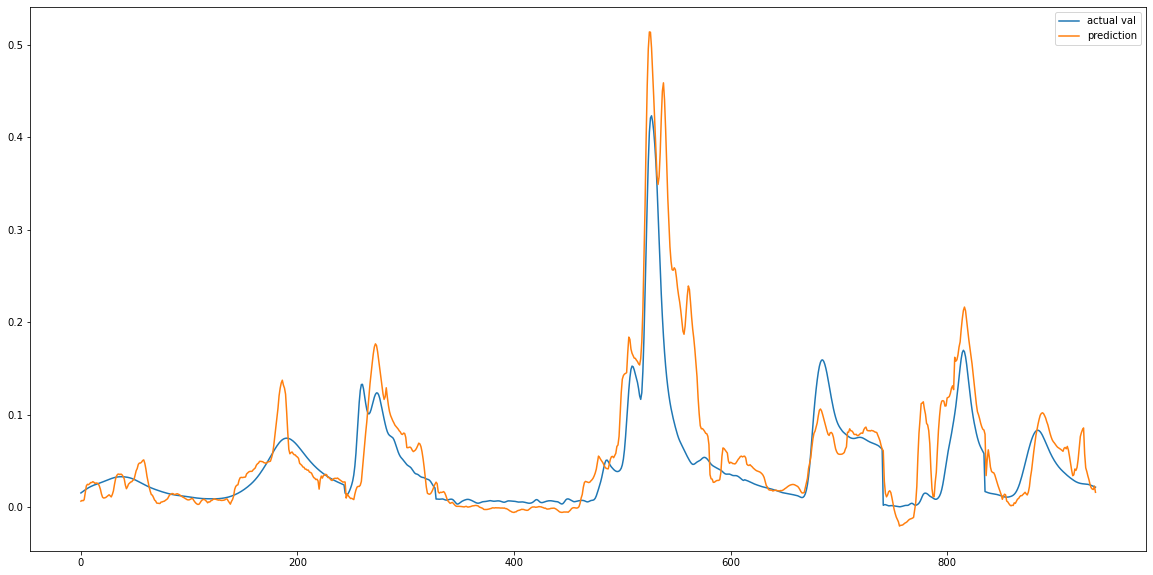

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(val_label, label = 'actual val')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [25]:
# make a prediction
yhat = model.predict(x_valid)
x_valid = x_valid.reshape((x_valid.shape[0], x_valid.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, x_valid[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_valid = y_valid.reshape((len(y_valid), 1))
inv_y = concatenate((y_valid, x_valid[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: cannot reshape array of size 260440 into shape (383,34)